# Data Science for Mobility / Intro to Business Analytics

## Lecture 3 - Panda, statistics

Today, we'll explore in more depth the possibilities provided by the Python Pandas module. To make things less confusing, we decided to use the same dataset as last week. In fact, you'll start with doing exactly the **same** exercises. Then, an incremental set of exercises deal with categorical data in order to prepare for actual data science.

**This notebook was designed to be done (or, at least, started) at the classroom. It's possible that mid-way or so, you'll feel comfortable to complete it by yourself, but we designed it such that we will be around most of the time. **

So, let's start. Since we are going to work with Pandas, let's just import it, shall we (you'll eventually also need Numpy, so import that too)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

We need some data. Please open the file "pickups_zone_1_15min.csv". This corresponds to the series of taxi-pickups in New York zone 1 (an area in the Manhattan island). 

You can use the method read_csv(file), which **returns** a DataFrame:

> df=pd.read_csv(file)

df is a variable that now has a Pandas DataFrame


In [2]:
df=pd.read_csv("pickups_zone_1_15min.csv")

Good, so we just loaded the file, now let's look at its content (and keep remembering how more complicated it was in Numpy). 

In [3]:
df.head()

date  hour  minute  pickups
0  2009-01-01     0       0        0
1  2009-01-01     0      15      166
2  2009-01-01     0      30      215
3  2009-01-01     0      45      223
4  2009-01-01     1       0      245

Just to be sure, let's check how many lines the file actually has (now it should be 262848, one line less than with Numpy, why?). 

In [4]:
len(df)

262848

Print the first 10 lines of this file.

In [5]:
df[:10]

date  hour  minute  pickups
0  2009-01-01     0       0        0
1  2009-01-01     0      15      166
2  2009-01-01     0      30      215
3  2009-01-01     0      45      223
4  2009-01-01     1       0      245
5  2009-01-01     1      15      182
6  2009-01-01     1      30      181
7  2009-01-01     1      45      190
8  2009-01-01     2       0      197
9  2009-01-01     2      15      212

Oh, remember that we need to make a single field with the datetime (instead of 3 separate ones...)!

Pandas actually allows us to simplify that right when we load the file. So, let's do it again, but now take a look at the following Stackexchange thread: https://stackoverflow.com/questions/38509512/pandas-read-csv-with-date-in-2-columns

How about applying this here?



In [6]:
df2=pd.read_csv("pickups_zone_17_15min.csv")
df3=pd.read_csv("pickups_zone_21_15min.csv")
df4=pd.read_csv("pickups_zone_28_15min.csv")

df=pd.read_csv("pickups_zone_1_15min.csv")
df['datetime']=pd.to_datetime(df['date'])
df['hour']=pd.to_timedelta(df.hour, unit='h')
df['minute']=pd.to_timedelta(df.minute,unit='min')
df['datetime']+=df['hour']
df['datetime']+=df['minute']
df = df.set_index('datetime')
df.drop(['date','hour','minute'], axis=1, inplace=True)
df.head()

pickups
datetime                    
2009-01-01 00:00:00        0
2009-01-01 00:15:00      166
2009-01-01 00:30:00      215
2009-01-01 00:45:00      223
2009-01-01 01:00:00      245

It may happen that the (new) temporal field is still a string and not a datetime object. Can you correct that?

In fact, it can be useful to assign the time as index for our dataframe. Let's do that with the method set_index() of the DataFrame object. Notice that it doesn't do "in-place" changes, in other words, this command would not work: 
> df.set_index(KEY)

You'd have to do

>df=df.set_index(KEY)

In [7]:
df.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:15:00',
               '2009-01-01 00:30:00', '2009-01-01 00:45:00',
               '2009-01-01 01:00:00', '2009-01-01 01:15:00',
               '2009-01-01 01:30:00', '2009-01-01 01:45:00',
               '2009-01-01 02:00:00', '2009-01-01 02:15:00',
               ...
               '2016-06-30 21:30:00', '2016-06-30 21:45:00',
               '2016-06-30 22:00:00', '2016-06-30 22:15:00',
               '2016-06-30 22:30:00', '2016-06-30 22:45:00',
               '2016-06-30 23:00:00', '2016-06-30 23:15:00',
               '2016-06-30 23:30:00', '2016-06-30 23:45:00'],
              dtype='datetime64[ns]', name='datetime', length=262848, freq=None)

Important note: You can always get a vector with the indeces themselves with 
> df.index

To understand this, just try it yourself

So, just for fun (and to compare with the amount of work we did with Numpy), let's get **only** the pickups part. 

In [8]:
df.pickups.values

array([  0, 166, 215, ..., 283, 276, 230])

Trivial, isn't it? It's even indexed correctly! :-)

Now, it's time for our histogram for the pickups. If you can't remember or don't know how it's done, feel free to search online (something like "Pandas histogram")

again, don't forget to add

>import matplotlib.pyplot as plt
>
>%matplotlib inline



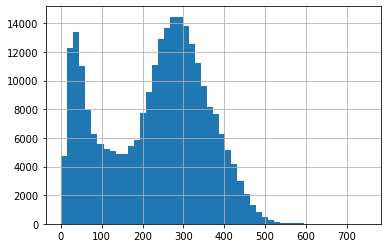

In [9]:
%matplotlib inline
df.pickups.hist(bins=50)

It's even scary how easy it is, right?

What about the scatter plot? It won't be as direct, you will have to use the pyplot one (the one you used last time)

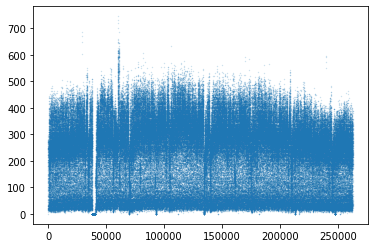

In [10]:
plt.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, alpha=0.3);

Now let's do that version with the colors. As last time, you need to create a new vector with the minutes since midnight.

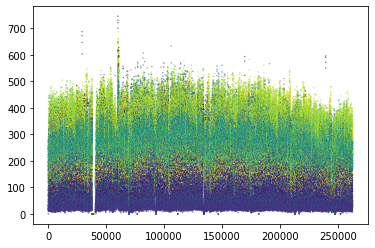

In [11]:
df['minute_of_day']=df.index.hour.values*60+df.index.minute.values
plt.scatter(range(len(df['pickups'])), df['pickups'], s=0.1, c=df['minute_of_day']);

Even though it may sound redundant, it may be useful to add this new series to the DataFrame (as a new column, in practice).

So, let's do the graph with the colors. 

Remember, imagine that the number of minutes since midnight (that you just created) corresponds to a color. The function scatter allows you to give this list straight away and plot it (just use the argument c, for example "c=my_minute_since_midnight_list". 

Do you want to try?

In [12]:
df.loc[df['minute_of_day']==1]

Empty DataFrame
Columns: [pickups, minute_of_day]
Index: []

Now, for the 24-hr average plot, where the x axis is 0 to 1440 (1440=24 hours X 60 minutes), and you show the average per minute.

(don't forget to add the 5 and 95 quantiles) 


A small tip (mean of 15 minutes of the day):

> df.loc[df['minute_of_day']==15].mean()
>
>
Output:

pickups          205.344047

minute_of_day     15.000000

dtype: float64


**IMPORTANT:** notice that the output above is not just the mean of the _pickups_ (which is what we want). It also returns the mean of the minute_of\_day itself (which is obviously 15!)... This may confuse things later on, so how do you get the mean of pickups only?



Now, use this to do the 24-hr average plot

In [13]:
%matplotlib inline

def read_and_print(filename):
    df=pd.read_csv(filename)
    df['datetime']=pd.to_datetime(df['date'])
    df['hour']=pd.to_timedelta(df.hour, unit='h')
    df['minute']=pd.to_timedelta(df.minute,unit='min')
    df['datetime']+=df['hour']
    df['datetime']+=df['minute']
    df = df.set_index('datetime')
    df.drop(['date','hour','minute'], axis=1, inplace=True)
    fig, axs = plt.subplots(4,1,figsize=(10,5))
    df.pickups.hist(bins=50,ax=axs[0])
    axs[1].scatter(range(len(df['pickups'])), df['pickups'], s=0.1, alpha=0.3);
    df['minute_of_day']=df.index.hour.values*60+df.index.minute.values
    axs[2].scatter(range(len(df['pickups'])), df['pickups'], s=0.1, c=df['minute_of_day'])
    TIME_RESOLUTION=15
    day_ts=np.arange(0,1440, TIME_RESOLUTION)
    average_line2 = df.groupby('minute_of_day')['pickups'].mean()
    q5_line2=df.groupby('minute_of_day')['pickups'].quantile(0.05)
    q95_line2=df.groupby('minute_of_day')['pickups'].quantile(0.95)
    mean_df=pd.DataFrame(np.column_stack((average_line2,q5_line2,q95_line2)),columns=['average','q5','q95'])
    mean_df['range']=day_ts
    mean_df = mean_df.set_index('range')
    mean_df.plot(style=['b-','g--','p--'],ax=axs[3])

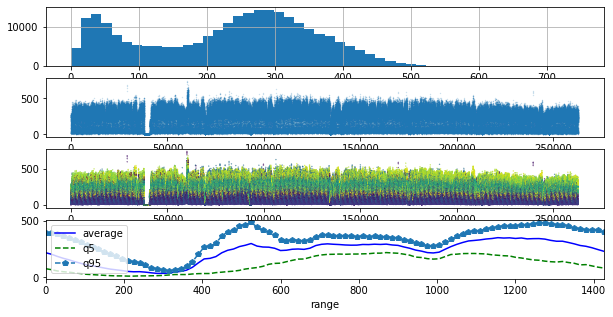

In [14]:
read_and_print("pickups_zone_1_15min.csv")

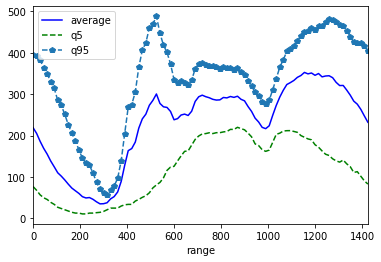

In [15]:
TIME_RESOLUTION=15
day_ts=np.arange(0,1440, TIME_RESOLUTION)
average_line2 = df.groupby('minute_of_day')['pickups'].mean()
q5_line2=df.groupby('minute_of_day')['pickups'].quantile(0.05)
q95_line2=df.groupby('minute_of_day')['pickups'].quantile(0.95)
mean_df=pd.DataFrame(np.column_stack((average_line2,q5_line2,q95_line2)),columns=['average','q5','q95'])
mean_df['range']=day_ts
mean_df = mean_df.set_index('range')
mean_df.plot(style=['b-','g--','p--'])

Ok, again, you did a lot of stuff. Why not reorganize it again?

For example, a new function that receives the file name, and generates all the graphs you did so far.

Wouldn't it be cool to just generate those by a single command?

### Correlations

One very important task in Data Science modeling is to find (and understand) correlations between different variables. Let's do a few simple exercises.

Let's start with a simple question: are the different areas correlated between them? If yes, it may be interesting knowledge. For example, maybe we can share data between them to predict better, later.


Tip: Try to make a single DataFrame with ALL time series (s1, s17, s21, s28). 


In [16]:
import datetime
def my_read_csv(file):
    df = pd.read_csv(file, sep=',', parse_dates={'dt': [0, 1, 2]})
    df['datetime']=df['dt'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H %M"))
    del df['dt']
    return df.set_index('datetime')
    

In [17]:
s1=my_read_csv("pickups_zone_1_15min.csv")
s17=my_read_csv("pickups_zone_17_15min.csv")
s21=my_read_csv("pickups_zone_21_15min.csv")
s28=my_read_csv("pickups_zone_28_15min.csv")

smerge=s1.join(s17, rsuffix="17")
smerge=smerge.join(s21, rsuffix="21")
smerge=smerge.join(s28, rsuffix="28")
smerge['pickups1']=smerge['pickups']
del smerge['pickups']
smerge.head()

pickups17  pickups21  pickups28  pickups1
datetime                                                      
2009-01-01 00:00:00        339        175         21         0
2009-01-01 00:15:00        285        394         29       166
2009-01-01 00:30:00        214        297         10       215
2009-01-01 00:45:00        202        322          9       223
2009-01-01 01:00:00        198        344          4       245

pickups17  pickups21  pickups28  pickups1
pickups17   1.000000   0.826310   0.660062  0.881971
pickups21   0.826310   1.000000   0.674388  0.879230
pickups28   0.660062   0.674388   1.000000  0.636816
pickups1    0.881971   0.879230   0.636816  1.000000

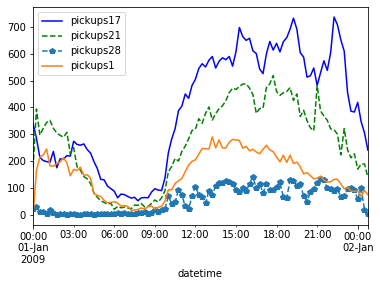

In [18]:
smerge[:100].plot(style=['b-','g--','p--'])
smerge.corr()

It seems all but area 28 are well correlated with each other. 

Now, a more interesting question: are there correlations between a given area, and the other areas in earlier time steps? 

This is a VERY important one. If you find high correlation, for example, between area 1 at time t, with area 17 at time t-1, then you can use area 17 to predict area 1!

To check this, you need to play a little bit with the vectors. Let's call a vector that is shifted in time for 1 time step, a "lag1" vector. 

The process is similar to Numpy's, but there's a few tweaks. To make things simpler, we copy a solution from Stackoverflow:

In [19]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

Let's now check those correlations

In [25]:
smerged_lagged_s1=buildLaggedFeatures(smerge, ['pickups1', 'pickups17', 'pickups21', 'pickups28'])
smerged_lagged_s1.head(5)
smerged_lagged_s1.corr()

pickups17  pickups21  pickups28  pickups1  pickups1_lag1  \
pickups17        1.000000   0.826312   0.660061  0.881973       0.894897   
pickups21        0.826312   1.000000   0.674390  0.879232       0.860141   
pickups28        0.660061   0.674390   1.000000  0.636814       0.643488   
pickups1         0.881973   0.879232   0.636814  1.000000       0.976706   
pickups1_lag1    0.894897   0.860141   0.643488  0.976706       1.000000   
pickups1_lag2    0.897279   0.831943   0.644030  0.954186       0.976703   
pickups17_lag1   0.982116   0.790979   0.646421  0.856308       0.881973   
pickups17_lag2   0.958838   0.747011   0.628015  0.822122       0.856308   
pickups21_lag1   0.852892   0.975829   0.685994  0.886399       0.879232   
pickups21_lag2   0.870269   0.951748   0.693090  0.883951       0.886400   
pickups28_lag1   0.670167   0.658548   0.920108  0.626386       0.636815   
pickups28_lag2   0.675169   0.637625   0.867725  0.612619       0.626387   

                pickups1_lag2  pickups17_lag1  pickups17_lag2  pickups21_lag1  \
pickups17            0.897279        0.982116        0.958838        0.852892   
pickups21            0.831943        0.790979        0.747011        0.975829   
pickups28            0.644030        0.646421        0.628015        0.685994   
pickups1             0.954186        0.856308        0.822122        0.886399   
pickups1_lag1        0.976703        0.881973        0.856308        0.879232   
pickups1_lag2        1.000000        0.894895        0.881971        0.860135   
pickups17_lag1       0.894895        1.000000        0.982116        0.826312   
pickups17_lag2       0.881971        0.982116        1.000000        0.790981   
pickups21_lag1       0.860135        0.826312        0.790981        1.000000   
pickups21_lag2       0.879233        0.852894        0.826314        0.975826   
pickups28_lag1       0.643489        0.660062        0.646421        0.674389   
pickups28_lag2       0.636816        0.670168        0.660062        0.658548   

                pickups21_lag2  pickups28_lag1  pickups28_lag2  
pickups17             0.870269        0.670167        0.675169  
pickups21             0.951748        0.658548        0.637625  
pickups28             0.693090        0.920108        0.867725  
pickups1              0.883951        0.626386        0.612619  
pickups1_lag1         0.886400        0.636815        0.626387  
pickups1_lag2         0.879233        0.643489        0.636816  
pickups17_lag1        0.852894        0.660062        0.670168  
pickups17_lag2        0.826314        0.646421        0.660062  
pickups21_lag1        0.975826        0.674389        0.658548  
pickups21_lag2        1.000000        0.685997        0.674392  
pickups28_lag1        0.685997        1.000000        0.920108  
pickups28_lag2        0.674392        0.920108        1.000000

WOW! Very interesting!! This means that you can use data from these other areas to predict for area 1... This is useful when there is missing data in area 1, for example... 

Now, let's get to the autocorrelogram. Well, in Pandas, this is trivial!

You can use the auto_corr method:

>s1=df['pickups'] #s1 is now a Series
>
>print(s1.autocorr(1))  #gives the autocorrelation of lag 1

Output:

0.97670270955196936


Cool, now you just need to get values for the different lags (1, 2, 3, 4...) and plot the values!

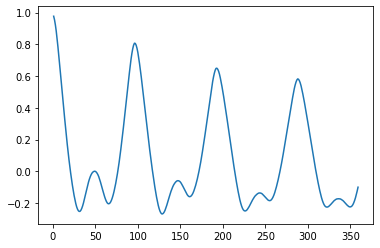

In [28]:
s1=df['pickups']
autocors=[s1.autocorr(lag) for lag in range(1, 3*120)]


plt.plot(range(1,3*120), autocors)
plt.show()

### Categorical variables, combining datasets

Ok, you're almost ready to start rockin' with actual Data Science learning (next week: Regression models :-) ). 

There's a last thing before that. Quite often, the data that you get is not in numerical form. Two obvious examples are time partitioning, like weekdays ("Monday", "Tuesday"...) or time of day ("Morning rush hour", "lunch time"). These are in fact words, how can we use them in our modeling, if in practice it always requires numerical quantities?

Particularly with mobility data, the examples above are quite common. For example, the time of day (rush hour VS low demand times) can be crucial for prediction!


Let's start by creating a new column in our dataframe with the day of week (we'll do it for you):

In [36]:
smerge['weekday']=[i.weekday() for i in smerge.index]
smerge[100:500]

pickups17  pickups21  pickups28  pickups1  weekday
datetime                                                               
2009-01-02 01:00:00        220        121          2        57        4
2009-01-02 01:15:00        191        100          1        54        4
2009-01-02 01:30:00        190         73          0        65        4
2009-01-02 01:45:00        123         66          1        24        4
2009-01-02 02:00:00        112         69          0        34        4
...                        ...        ...        ...       ...      ...
2009-01-06 03:45:00         76         13          0        21        1
2009-01-06 04:00:00         75         11          0        16        1
2009-01-06 04:15:00         67         22          1        12        1
2009-01-06 04:30:00         61         27          2        14        1
2009-01-06 04:45:00         51         33          0        19        1

[400 rows x 5 columns]

To make sure that it worked just take a look at the resulting DataFrame

Wow, these are already numbers, but wait!... Do those quantities mean actually _something_ or aren't they just individual symbols for the week days?

Other ways to respond to this question: if instead of these numbers you used others (e.g. starting at 1 instead of 0?) wouldn't the result be the same? If you use algebra on it, does the result make sense (Thursday-Tuesday=Wednesday...). 

The bottom line is that, in general, you shouldn't use these numbers directly in a regression model because week days do not correspond to quantities. This is a **categorical** variable, which can have one of a finite set of values. In our case:

_weekday_ $\in $ {Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday}

So, let's convert those values into something useful. A first obvious thing to do is to get whether a day is a week day or weekend. Let's define a simple function for it:

In [38]:
def is_weekend(weekday):
    return weekday in [5,6]
is_weekend(5)

True

You can test it...

Another nice thing will be to actually put names there. Here's another function

In [39]:

def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"

Now, let's create the new columns in our DataFrame!

In [42]:
smerge['is_weekend']=[is_weekend(el) for el in smerge['weekday']]
smerge['wd']=[weekday_word(el.weekday()) for el in smerge.index]

Take a look at the new DataFrame. Seems more useful, right? 

In [43]:
smerge

pickups17  pickups21  pickups28  pickups1  weekday  \
datetime                                                                  
2009-01-01 00:00:00        339        175         21         0        3   
2009-01-01 00:15:00        285        394         29       166        3   
2009-01-01 00:30:00        214        297         10       215        3   
2009-01-01 00:45:00        202        322          9       223        3   
2009-01-01 01:00:00        198        344          4       245        3   
...                        ...        ...        ...       ...      ...   
2016-06-30 22:45:00        593        347        168       316        3   
2016-06-30 23:00:00        617        252        104       299        3   
2016-06-30 23:15:00        580        246         87       283        3   
2016-06-30 23:30:00        595        208        129       276        3   
2016-06-30 23:45:00        521        171        119       230        3   

                     is_weekend        wd  
datetime                                   
2009-01-01 00:00:00       False  Thursday  
2009-01-01 00:15:00       False  Thursday  
2009-01-01 00:30:00       False  Thursday  
2009-01-01 00:45:00       False  Thursday  
2009-01-01 01:00:00       False  Thursday  
...                         ...       ...  
2016-06-30 22:45:00       False  Thursday  
2016-06-30 23:00:00       False  Thursday  
2016-06-30 23:15:00       False  Thursday  
2016-06-30 23:30:00       False  Thursday  
2016-06-30 23:45:00       False  Thursday  

[262848 rows x 7 columns]

Let's get the "time of day" information. Again, we provide you with the corresponding function. 

In [44]:
def time_of_day(hour):
    if hour<7:
        return "night"
    elif hour<9:
        return "morning rush"
    elif hour<12:
        return "morning"
    elif hour<14:
        return "lunch time"
    elif hour<17:
        return "afternoon"
    elif hour<20:
        return "afternoon rush"
    elif hour<23:
        return "evening"
    else:
        return "night"
    
#In fact, we created another function that has the SAME functionality as above just to show you how compact and elegant 
# Python can be. 
# Don't worry, you're not expected to reach this level before of a lot of experience. 
def time_of_day2(hour):    
    h_thresholds=[7,8,12,14,17,20,23]
    h_names=["night", "morning rush", "morning", "lunch time", "afternoon", "afternoon rush", "evening", "night"]
    return h_names[next(x[0] for x in enumerate(h_thresholds) if x[1] >hour)]



Can you create the new column with time of day?

In [50]:
smerge['time_of_day']=[time_of_day(el.hour) for el in smerge.index]
# [el.hour for el in smerge.index]

The other **very important** technique is to transform categorical variables into "dummy variables". A dummy variable is typically binary (so it's either 1/0, or True/False), and corresponds to one single possible categorical value. 

**So, you transform a single variable with N different values **

_time of day -> {night, morning rush, morning...evening}_

**into N dummy variables, each one with 2 values (1 or 0):**

_night -> {0, 1}_

_morning rush -> {0, 1}_

_..._

_evening -> {0, 1}_


Yes, we know it sounds like hard work, but in Pandas, it's all done trivially:

In [52]:
sm_dummies=pd.get_dummies(smerge, columns=['time_of_day'])  #this creates dummies for the "time_of_day" variable. 

Finally, a well deserved reward for you. Just run the method describe() in your DataFrame and enjoy!... 

>s.describe()
>

Output:

_something useful_  :-)


Think about how many lines you would have needed in Numpy! 

In [53]:
sm_dummies

pickups17  pickups21  pickups28  pickups1  weekday  \
datetime                                                                  
2009-01-01 00:00:00        339        175         21         0        3   
2009-01-01 00:15:00        285        394         29       166        3   
2009-01-01 00:30:00        214        297         10       215        3   
2009-01-01 00:45:00        202        322          9       223        3   
2009-01-01 01:00:00        198        344          4       245        3   
...                        ...        ...        ...       ...      ...   
2016-06-30 22:45:00        593        347        168       316        3   
2016-06-30 23:00:00        617        252        104       299        3   
2016-06-30 23:15:00        580        246         87       283        3   
2016-06-30 23:30:00        595        208        129       276        3   
2016-06-30 23:45:00        521        171        119       230        3   

                     is_weekend        wd  time_of_day_afternoon  \
datetime                                                           
2009-01-01 00:00:00       False  Thursday                      0   
2009-01-01 00:15:00       False  Thursday                      0   
2009-01-01 00:30:00       False  Thursday                      0   
2009-01-01 00:45:00       False  Thursday                      0   
2009-01-01 01:00:00       False  Thursday                      0   
...                         ...       ...                    ...   
2016-06-30 22:45:00       False  Thursday                      0   
2016-06-30 23:00:00       False  Thursday                      0   
2016-06-30 23:15:00       False  Thursday                      0   
2016-06-30 23:30:00       False  Thursday                      0   
2016-06-30 23:45:00       False  Thursday                      0   

                     time_of_day_afternoon rush  time_of_day_evening  \
datetime                                                               
2009-01-01 00:00:00                           0                    0   
2009-01-01 00:15:00                           0                    0   
2009-01-01 00:30:00                           0                    0   
2009-01-01 00:45:00                           0                    0   
2009-01-01 01:00:00                           0                    0   
...                                         ...                  ...   
2016-06-30 22:45:00                           0                    1   
2016-06-30 23:00:00                           0                    0   
2016-06-30 23:15:00                           0                    0   
2016-06-30 23:30:00                           0                    0   
2016-06-30 23:45:00                           0                    0   

                     time_of_day_lunch time  time_of_day_morning  \
datetime                                                           
2009-01-01 00:00:00                       0                    0   
2009-01-01 00:15:00                       0                    0   
2009-01-01 00:30:00                       0                    0   
2009-01-01 00:45:00                       0                    0   
2009-01-01 01:00:00                       0                    0   
...                                     ...                  ...   
2016-06-30 22:45:00                       0                    0   
2016-06-30 23:00:00                       0                    0   
2016-06-30 23:15:00                       0                    0   
2016-06-30 23:30:00                       0                    0   
2016-06-30 23:45:00                       0                    0   

                     time_of_day_morning rush  time_of_day_night  
datetime                                                          
2009-01-01 00:00:00                         0                  1  
2009-01-01 00:15:00                         0                  1  
2009-01-01 00:30:00                         0                  1  
200